In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil
shutil.move('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented).zip','/content/New Plant Diseases Dataset(Augmented).zip')
!unzip 'New Plant Diseases Dataset(Augmented).zip'

In [3]:
!mkdir /content/scores_graphs

In [4]:
save_dir="/content/scores_graphs"

In [5]:
import warnings
import os
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import numpy as np
np.random.seed(0)
import itertools
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.metrics import Precision,Recall,AUC,CategoricalCrossentropy,MeanSquaredError,MeanAbsoluteError

In [6]:
train_gen = ImageDataGenerator(rescale=1./255,horizontal_flip=True)
training_set=train_gen.flow_from_directory("/content/New Plant Diseases Dataset(Augmented)/train",target_size=(256,256),batch_size=32,class_mode='categorical')
test_gen = ImageDataGenerator(rescale=1./255)
test_set=test_gen.flow_from_directory("/content/New Plant Diseases Dataset(Augmented)/valid",target_size=(256,256),batch_size=32,class_mode='categorical')


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


##AlexNet

In [7]:
def create_model():

  alexnet_model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(256,256,3)),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
      tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
      tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(4096, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(4096, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(38, activation='softmax')
  ])

  opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
  alexnet_model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy',Precision(),Recall(),AUC(),CategoricalCrossentropy(),MeanAbsoluteError(),MeanSquaredError()])
  return alexnet_model

In [8]:
epochs=[]
loss=[]
accuracy=[]
precision=[]
recall=[]
f1=[]
auc=[]
cross=[]
mae=[]
mse=[]

550/550 [==============================] - 37s 68ms/step - loss: 2.1372 - accuracy: 0.4993 - precision: 0.5598 - recall: 0.4520 - auc: 0.9101 - categorical_crossentropy: 2.1372 - mean_absolute_error: 0.0283 - mean_squared_error: 0.0192
For epoch= 1
Loss: 213.7248992919922
Accuracy: 49.926018714904785
Precision: 55.97603917121887
Recall: 45.20259499549866
F1 Score: 180.81037998199463
AUC: 91.00652933120728
Categorical CrossEntropy: 2.137248992919922
MAE: 2.830974757671356
MSE: 1.9221561029553413
550/550 [==============================] - 40s 72ms/step


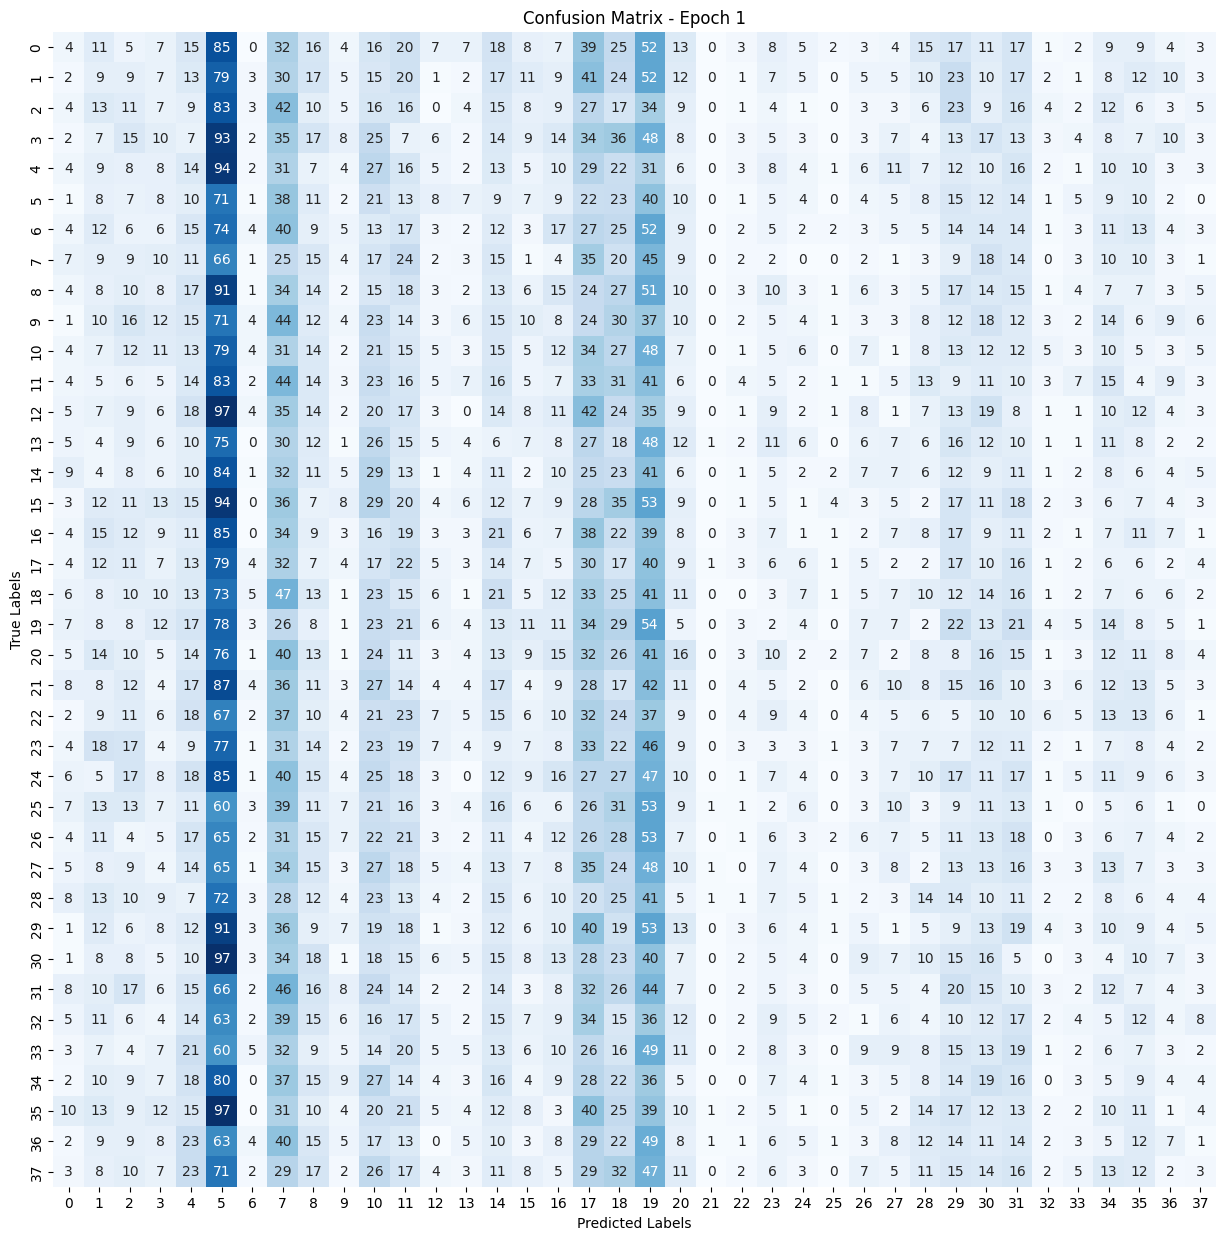

Epoch 1/2
2197/2197 [==============================] - 234s 104ms/step - loss: 1.2870 - accuracy: 0.6470 - precision_1: 0.7580 - recall_1: 0.5789 - auc_1: 0.9591 - categorical_crossentropy: 1.2870 - mean_absolute_error: 0.0221 - mean_squared_error: 0.0127 - val_loss: 1.9653 - val_accuracy: 0.4480 - val_precision_1: 0.5582 - val_recall_1: 0.3792 - val_auc_1: 0.9274 - val_categorical_crossentropy: 1.9653 - val_mean_absolute_error: 0.0314 - val_mean_squared_error: 0.0196
Epoch 2/2
550/550 [==============================] - 39s 71ms/step - loss: 1.1389 - accuracy: 0.6813 - precision_1: 0.7561 - recall_1: 0.6307 - auc_1: 0.9673 - categorical_crossentropy: 1.1389 - mean_absolute_error: 0.0196 - mean_squared_error: 0.0120
For epoch= 2
Loss: 113.89063596725464
Accuracy: 68.12542676925659
Precision: 75.60892701148987
Recall: 63.06624412536621
F1 Score: 252.26497650146484
AUC: 96.72931432723999
Categorical CrossEntropy: 1.1389063596725464
MAE: 1.963057741522789
MSE: 1.1950603686273098
550/550 [=

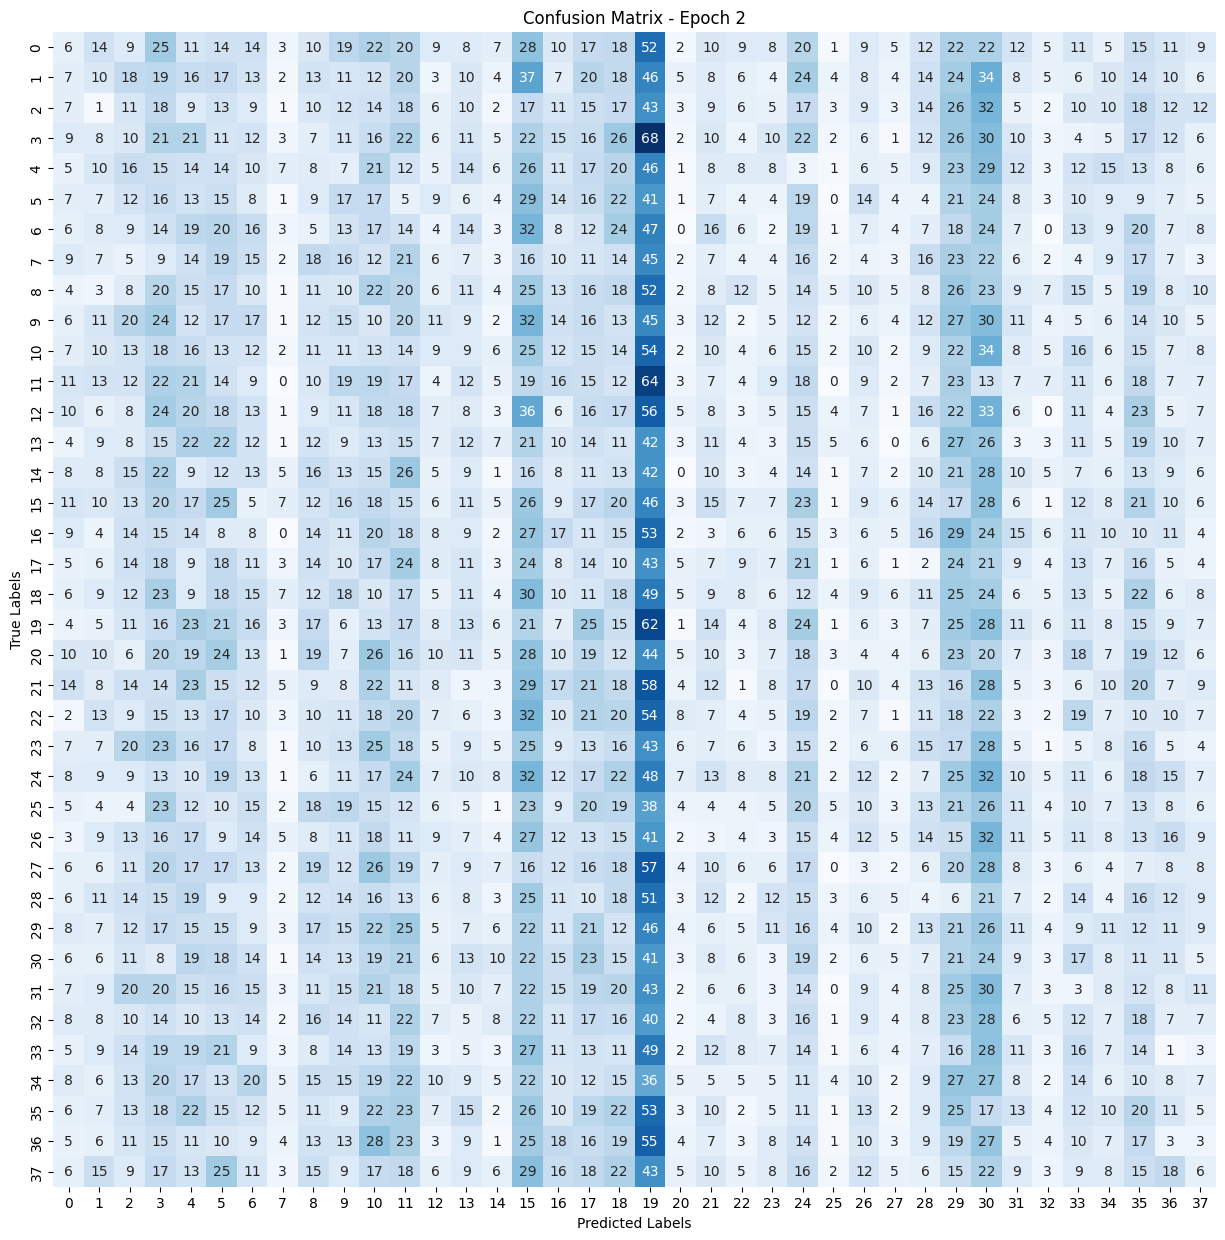

Epoch 1/3
2197/2197 [==============================] - 236s 105ms/step - loss: 1.2925 - accuracy: 0.6436 - precision_2: 0.7573 - recall_2: 0.5746 - auc_2: 0.9596 - categorical_crossentropy: 1.2925 - mean_absolute_error: 0.0223 - mean_squared_error: 0.0128 - val_loss: 2.6156 - val_accuracy: 0.4288 - val_precision_2: 0.5034 - val_recall_2: 0.3930 - val_auc_2: 0.8695 - val_categorical_crossentropy: 2.6156 - val_mean_absolute_error: 0.0315 - val_mean_squared_error: 0.0217
Epoch 2/3
2197/2197 [==============================] - 234s 106ms/step - loss: 0.4897 - accuracy: 0.8528 - precision_2: 0.8835 - recall_2: 0.8292 - auc_2: 0.9899 - categorical_crossentropy: 0.4897 - mean_absolute_error: 0.0098 - mean_squared_error: 0.0057 - val_loss: 1.7945 - val_accuracy: 0.5921 - val_precision_2: 0.6599 - val_recall_2: 0.5538 - val_auc_2: 0.9256 - val_categorical_crossentropy: 1.7945 - val_mean_absolute_error: 0.0236 - val_mean_squared_error: 0.0158
Epoch 3/3
550/550 [==============================] - 4

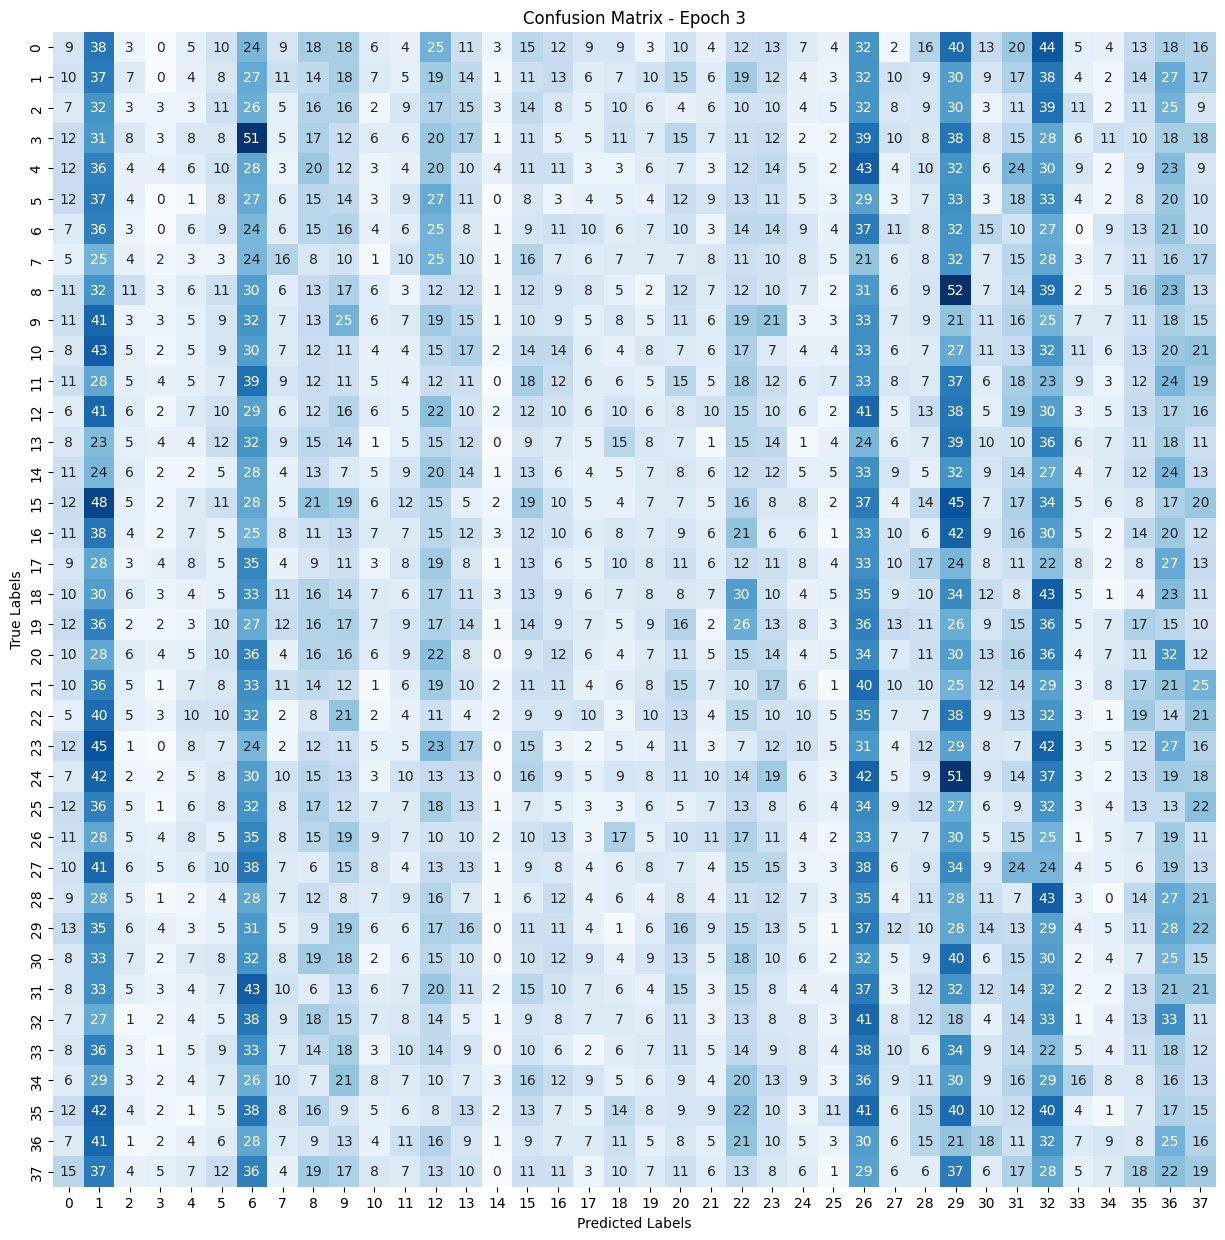

Epoch 1/4
2197/2197 [==============================] - 241s 107ms/step - loss: 1.2954 - accuracy: 0.6461 - precision_3: 0.7597 - recall_3: 0.5777 - auc_3: 0.9590 - categorical_crossentropy: 1.2954 - mean_absolute_error: 0.0222 - mean_squared_error: 0.0127 - val_loss: 1.1820 - val_accuracy: 0.6593 - val_precision_3: 0.7303 - val_recall_3: 0.6094 - val_auc_3: 0.9654 - val_categorical_crossentropy: 1.1820 - val_mean_absolute_error: 0.0205 - val_mean_squared_error: 0.0127
Epoch 2/4
2197/2197 [==============================] - 233s 106ms/step - loss: 0.4928 - accuracy: 0.8535 - precision_3: 0.8831 - recall_3: 0.8301 - auc_3: 0.9897 - categorical_crossentropy: 0.4928 - mean_absolute_error: 0.0098 - mean_squared_error: 0.0057 - val_loss: 0.5278 - val_accuracy: 0.8321 - val_precision_3: 0.8816 - val_recall_3: 0.7944 - val_auc_3: 0.9923 - val_categorical_crossentropy: 0.5278 - val_mean_absolute_error: 0.0115 - val_mean_squared_error: 0.0063
Epoch 3/4
2197/2197 [==============================] -

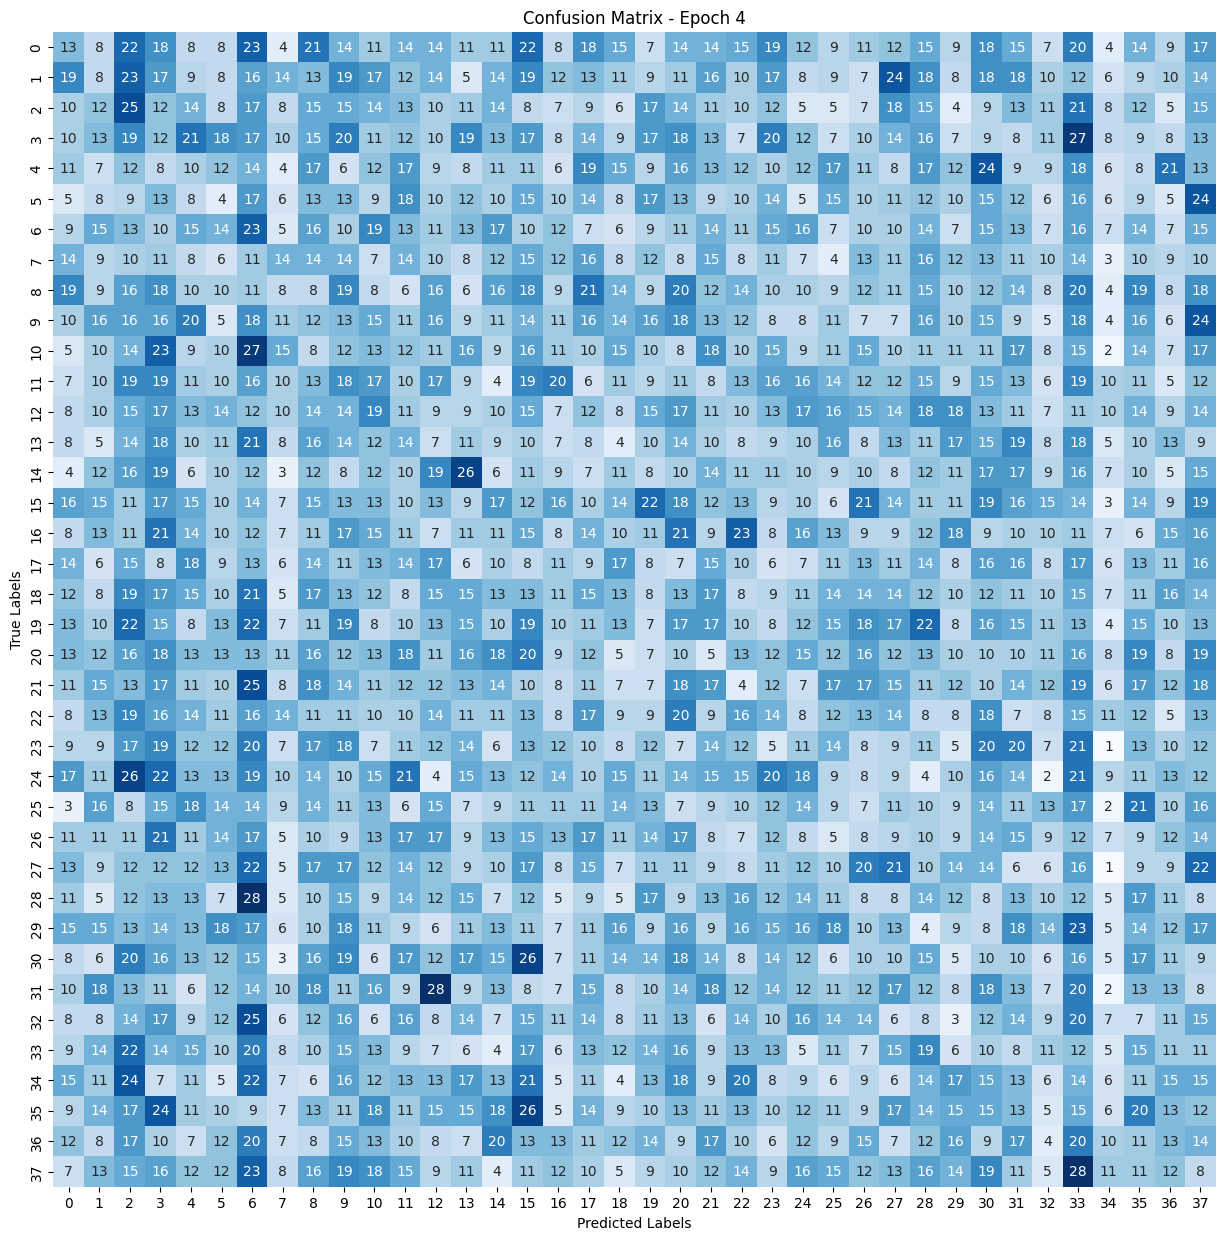

Epoch 1/5
2197/2197 [==============================] - 237s 105ms/step - loss: 1.3193 - accuracy: 0.6420 - precision_4: 0.7563 - recall_4: 0.5702 - auc_4: 0.9578 - categorical_crossentropy: 1.3193 - mean_absolute_error: 0.0225 - mean_squared_error: 0.0129 - val_loss: 2.2444 - val_accuracy: 0.4693 - val_precision_4: 0.5350 - val_recall_4: 0.4225 - val_auc_4: 0.8983 - val_categorical_crossentropy: 2.2444 - val_mean_absolute_error: 0.0299 - val_mean_squared_error: 0.0202
Epoch 2/5
2197/2197 [==============================] - 237s 108ms/step - loss: 0.4999 - accuracy: 0.8508 - precision_4: 0.8822 - recall_4: 0.8272 - auc_4: 0.9896 - categorical_crossentropy: 0.4999 - mean_absolute_error: 0.0099 - mean_squared_error: 0.0058 - val_loss: 0.9162 - val_accuracy: 0.7303 - val_precision_4: 0.8017 - val_recall_4: 0.6850 - val_auc_4: 0.9758 - val_categorical_crossentropy: 0.9162 - val_mean_absolute_error: 0.0172 - val_mean_squared_error: 0.0099
Epoch 3/5
2197/2197 [==============================] -

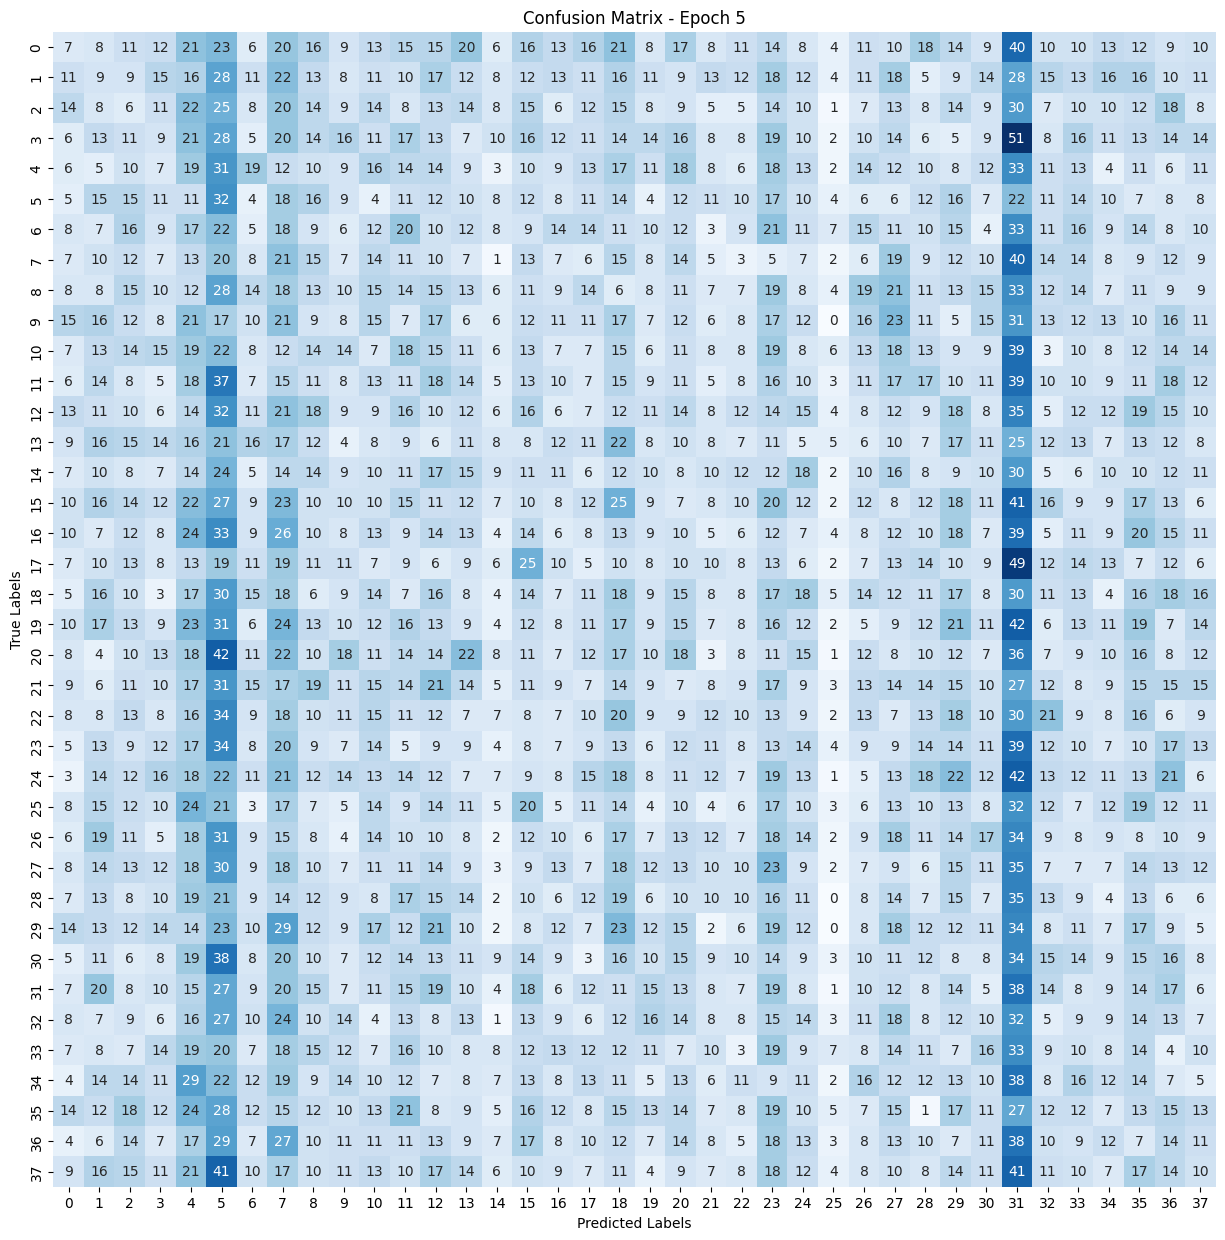

Epoch 1/6
2197/2197 [==============================] - 240s 107ms/step - loss: 1.2631 - accuracy: 0.6535 - precision_5: 0.7621 - recall_5: 0.5853 - auc_5: 0.9608 - categorical_crossentropy: 1.2631 - mean_absolute_error: 0.0218 - mean_squared_error: 0.0125 - val_loss: 1.8374 - val_accuracy: 0.5292 - val_precision_5: 0.6221 - val_recall_5: 0.4790 - val_auc_5: 0.9287 - val_categorical_crossentropy: 1.8374 - val_mean_absolute_error: 0.0268 - val_mean_squared_error: 0.0175
Epoch 2/6
2197/2197 [==============================] - 232s 106ms/step - loss: 0.4934 - accuracy: 0.8520 - precision_5: 0.8832 - recall_5: 0.8275 - auc_5: 0.9899 - categorical_crossentropy: 0.4934 - mean_absolute_error: 0.0099 - mean_squared_error: 0.0057 - val_loss: 1.4453 - val_accuracy: 0.6119 - val_precision_5: 0.6882 - val_recall_5: 0.5670 - val_auc_5: 0.9507 - val_categorical_crossentropy: 1.4453 - val_mean_absolute_error: 0.0225 - val_mean_squared_error: 0.0145
Epoch 3/6
2197/2197 [==============================] -

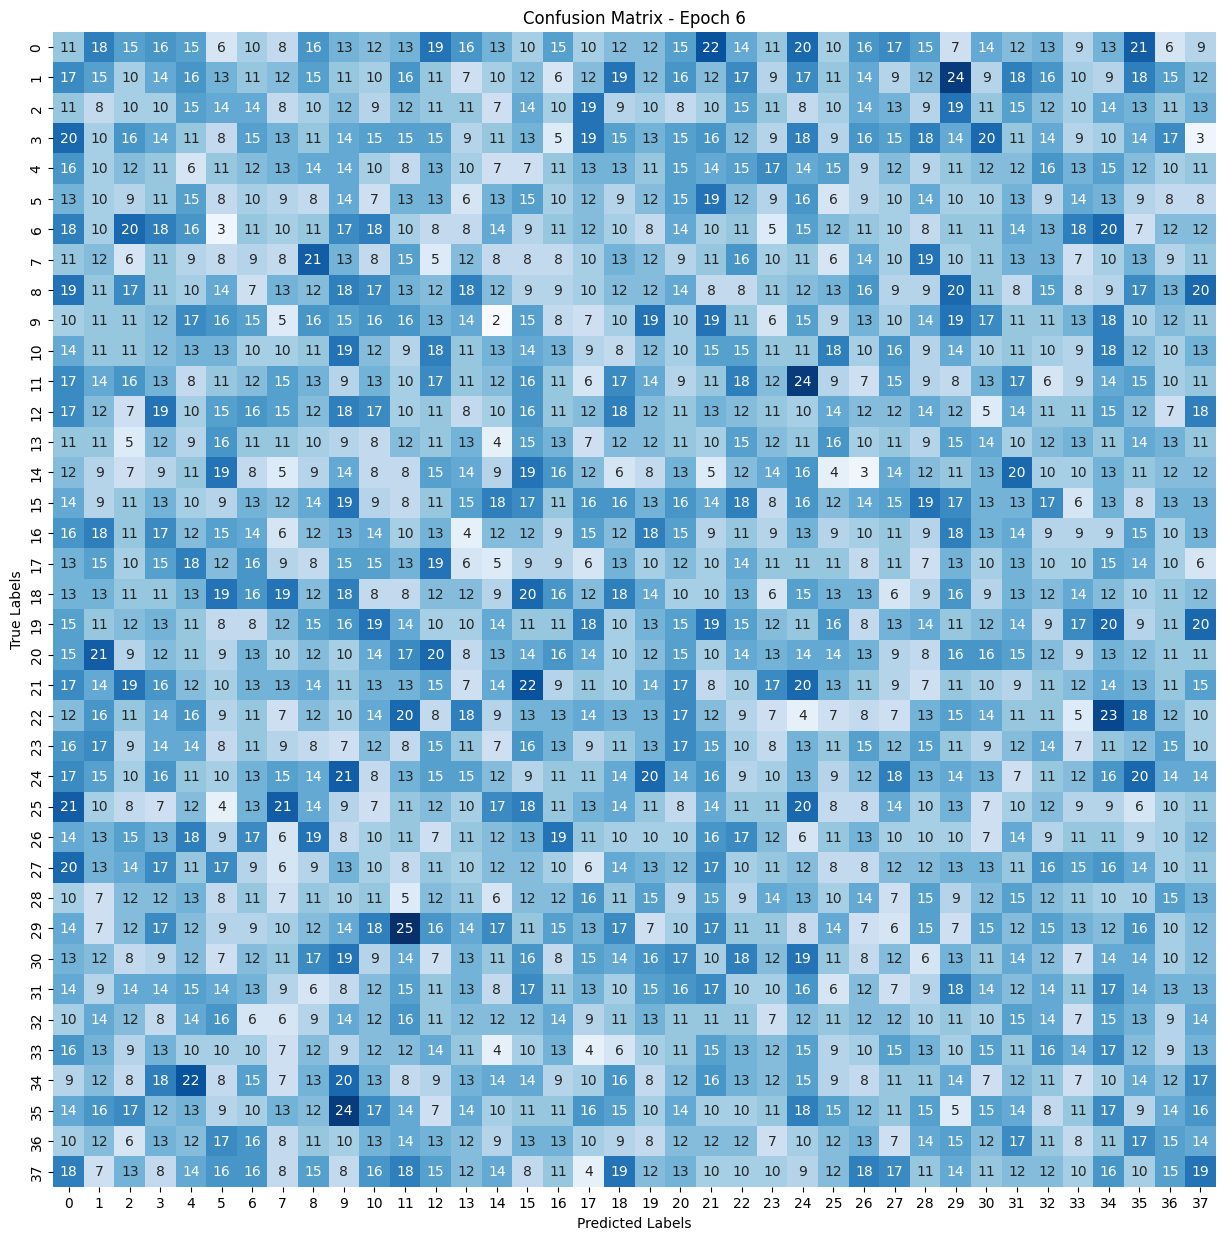

Epoch 1/7
2197/2197 [==============================] - 245s 109ms/step - loss: 1.2964 - accuracy: 0.6439 - precision_6: 0.7581 - recall_6: 0.5738 - auc_6: 0.9589 - categorical_crossentropy: 1.2964 - mean_absolute_error: 0.0223 - mean_squared_error: 0.0128 - val_loss: 1.8140 - val_accuracy: 0.5409 - val_precision_6: 0.6150 - val_recall_6: 0.4898 - val_auc_6: 0.9305 - val_categorical_crossentropy: 1.8140 - val_mean_absolute_error: 0.0263 - val_mean_squared_error: 0.0173
Epoch 2/7
2197/2197 [==============================] - 238s 108ms/step - loss: 0.4992 - accuracy: 0.8513 - precision_6: 0.8815 - recall_6: 0.8267 - auc_6: 0.9897 - categorical_crossentropy: 0.4992 - mean_absolute_error: 0.0100 - mean_squared_error: 0.0058 - val_loss: 1.2150 - val_accuracy: 0.6953 - val_precision_6: 0.7521 - val_recall_6: 0.6536 - val_auc_6: 0.9609 - val_categorical_crossentropy: 1.2150 - val_mean_absolute_error: 0.0184 - val_mean_squared_error: 0.0118
Epoch 3/7
2197/2197 [==============================] -

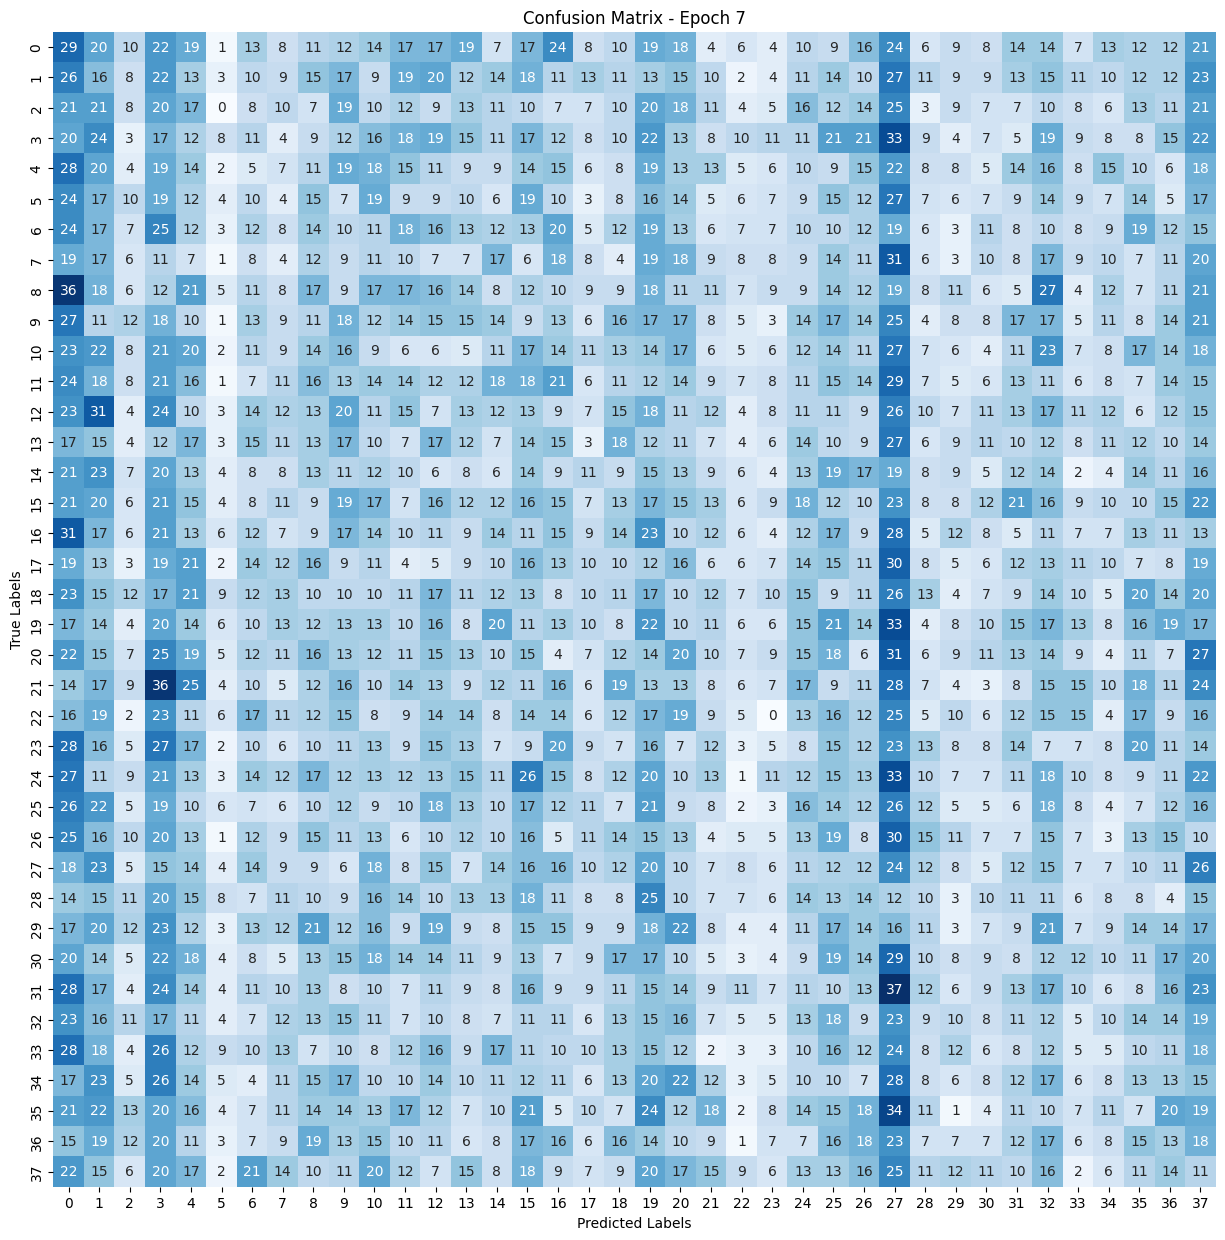

Epoch 1/8
2197/2197 [==============================] - 252s 112ms/step - loss: 1.2831 - accuracy: 0.6491 - precision_7: 0.7609 - recall_7: 0.5812 - auc_7: 0.9597 - categorical_crossentropy: 1.2831 - mean_absolute_error: 0.0220 - mean_squared_error: 0.0126 - val_loss: 3.2312 - val_accuracy: 0.3865 - val_precision_7: 0.4382 - val_recall_7: 0.3518 - val_auc_7: 0.8409 - val_categorical_crossentropy: 3.2312 - val_mean_absolute_error: 0.0336 - val_mean_squared_error: 0.0241
Epoch 2/8
2197/2197 [==============================] - 240s 109ms/step - loss: 0.5043 - accuracy: 0.8500 - precision_7: 0.8808 - recall_7: 0.8254 - auc_7: 0.9892 - categorical_crossentropy: 0.5043 - mean_absolute_error: 0.0100 - mean_squared_error: 0.0058 - val_loss: 0.9112 - val_accuracy: 0.7264 - val_precision_7: 0.7998 - val_recall_7: 0.6694 - val_auc_7: 0.9786 - val_categorical_crossentropy: 0.9112 - val_mean_absolute_error: 0.0179 - val_mean_squared_error: 0.0102
Epoch 3/8
2197/2197 [==============================] -

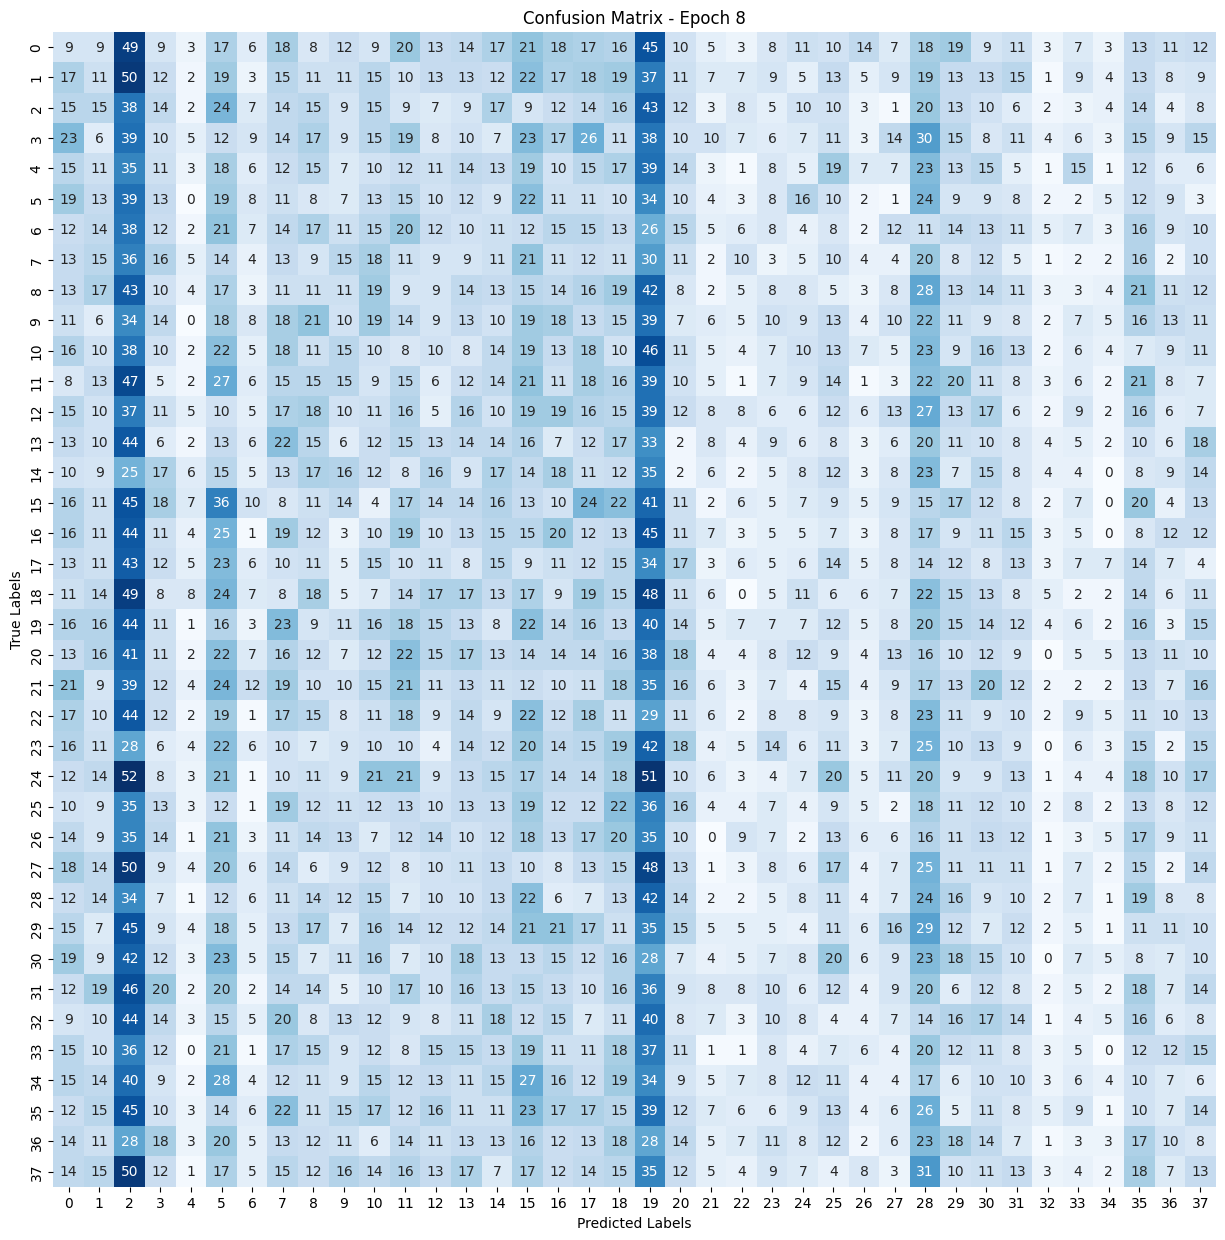

Epoch 1/9
2197/2197 [==============================] - 255s 114ms/step - loss: 1.2681 - accuracy: 0.6543 - precision_8: 0.7629 - recall_8: 0.5866 - auc_8: 0.9599 - categorical_crossentropy: 1.2681 - mean_absolute_error: 0.0218 - mean_squared_error: 0.0125 - val_loss: 0.8266 - val_accuracy: 0.7604 - val_precision_8: 0.8242 - val_recall_8: 0.7110 - val_auc_8: 0.9800 - val_categorical_crossentropy: 0.8266 - val_mean_absolute_error: 0.0157 - val_mean_squared_error: 0.0091
Epoch 2/9
2197/2197 [==============================] - 248s 113ms/step - loss: 0.4904 - accuracy: 0.8533 - precision_8: 0.8836 - recall_8: 0.8302 - auc_8: 0.9899 - categorical_crossentropy: 0.4904 - mean_absolute_error: 0.0097 - mean_squared_error: 0.0057 - val_loss: 1.2605 - val_accuracy: 0.6797 - val_precision_8: 0.7475 - val_recall_8: 0.6432 - val_auc_8: 0.9568 - val_categorical_crossentropy: 1.2605 - val_mean_absolute_error: 0.0188 - val_mean_squared_error: 0.0123
Epoch 3/9
2197/2197 [==============================] -

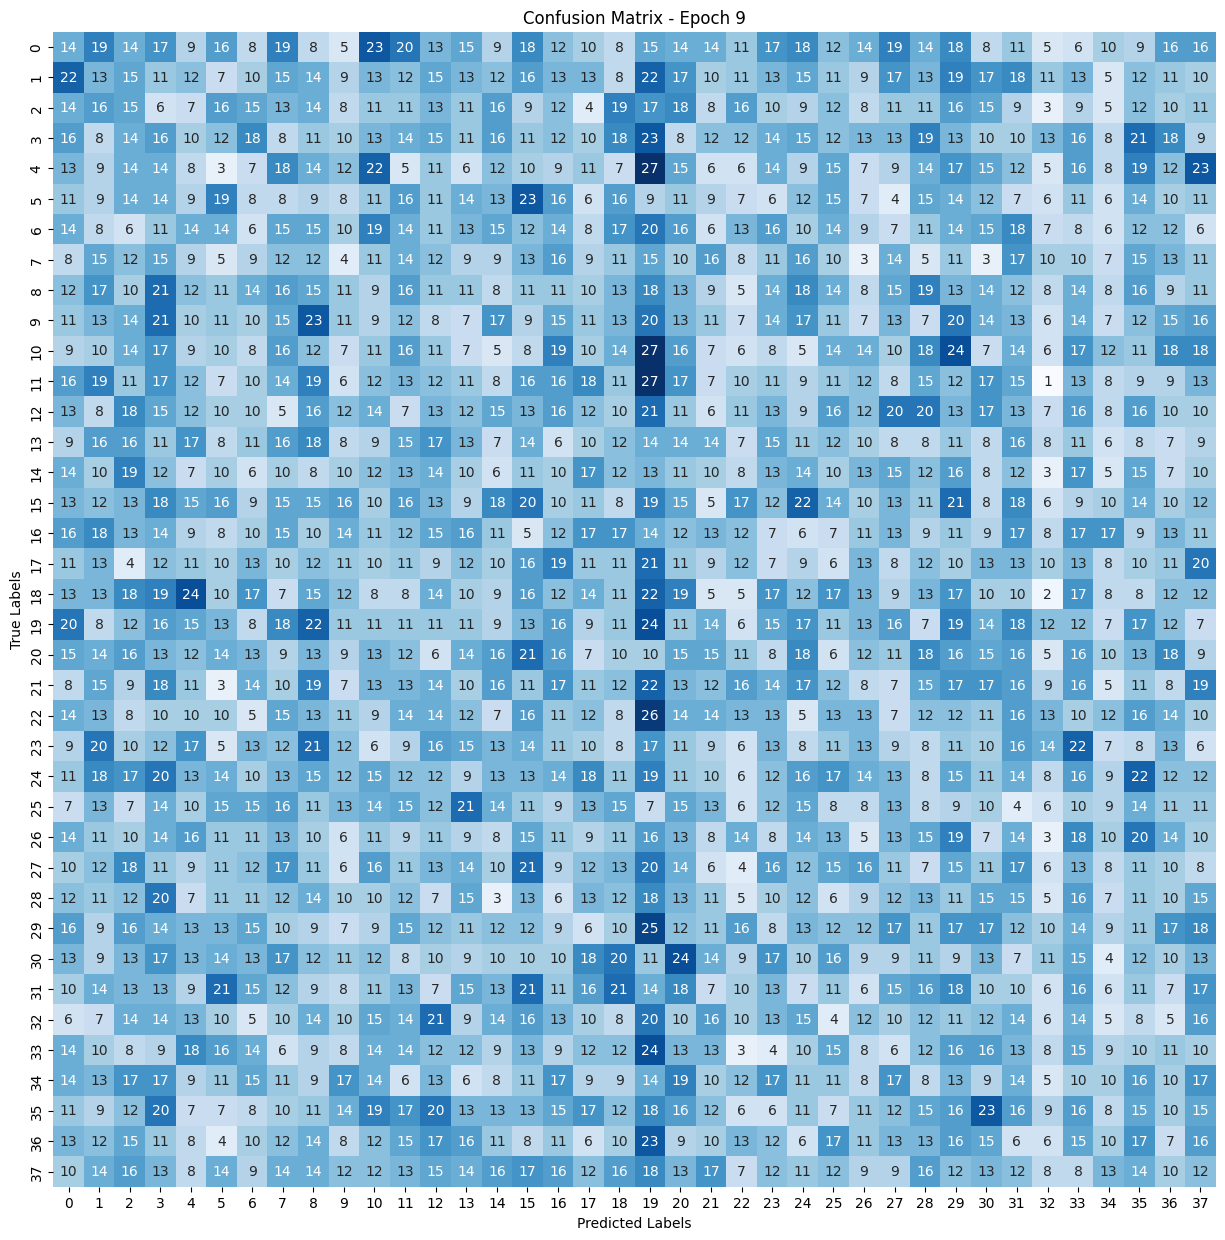

Epoch 1/10
2197/2197 [==============================] - 262s 117ms/step - loss: 1.2742 - accuracy: 0.6538 - precision_9: 0.7621 - recall_9: 0.5849 - auc_9: 0.9597 - categorical_crossentropy: 1.2742 - mean_absolute_error: 0.0218 - mean_squared_error: 0.0125 - val_loss: 1.7802 - val_accuracy: 0.5485 - val_precision_9: 0.6124 - val_recall_9: 0.4925 - val_auc_9: 0.9312 - val_categorical_crossentropy: 1.7802 - val_mean_absolute_error: 0.0263 - val_mean_squared_error: 0.0174
Epoch 2/10
2197/2197 [==============================] - 261s 119ms/step - loss: 0.4857 - accuracy: 0.8519 - precision_9: 0.8824 - recall_9: 0.8295 - auc_9: 0.9902 - categorical_crossentropy: 0.4857 - mean_absolute_error: 0.0098 - mean_squared_error: 0.0057 - val_loss: 1.3983 - val_accuracy: 0.6501 - val_precision_9: 0.7301 - val_recall_9: 0.6099 - val_auc_9: 0.9520 - val_categorical_crossentropy: 1.3983 - val_mean_absolute_error: 0.0205 - val_mean_squared_error: 0.0133
Epoch 3/10
2197/2197 [==============================

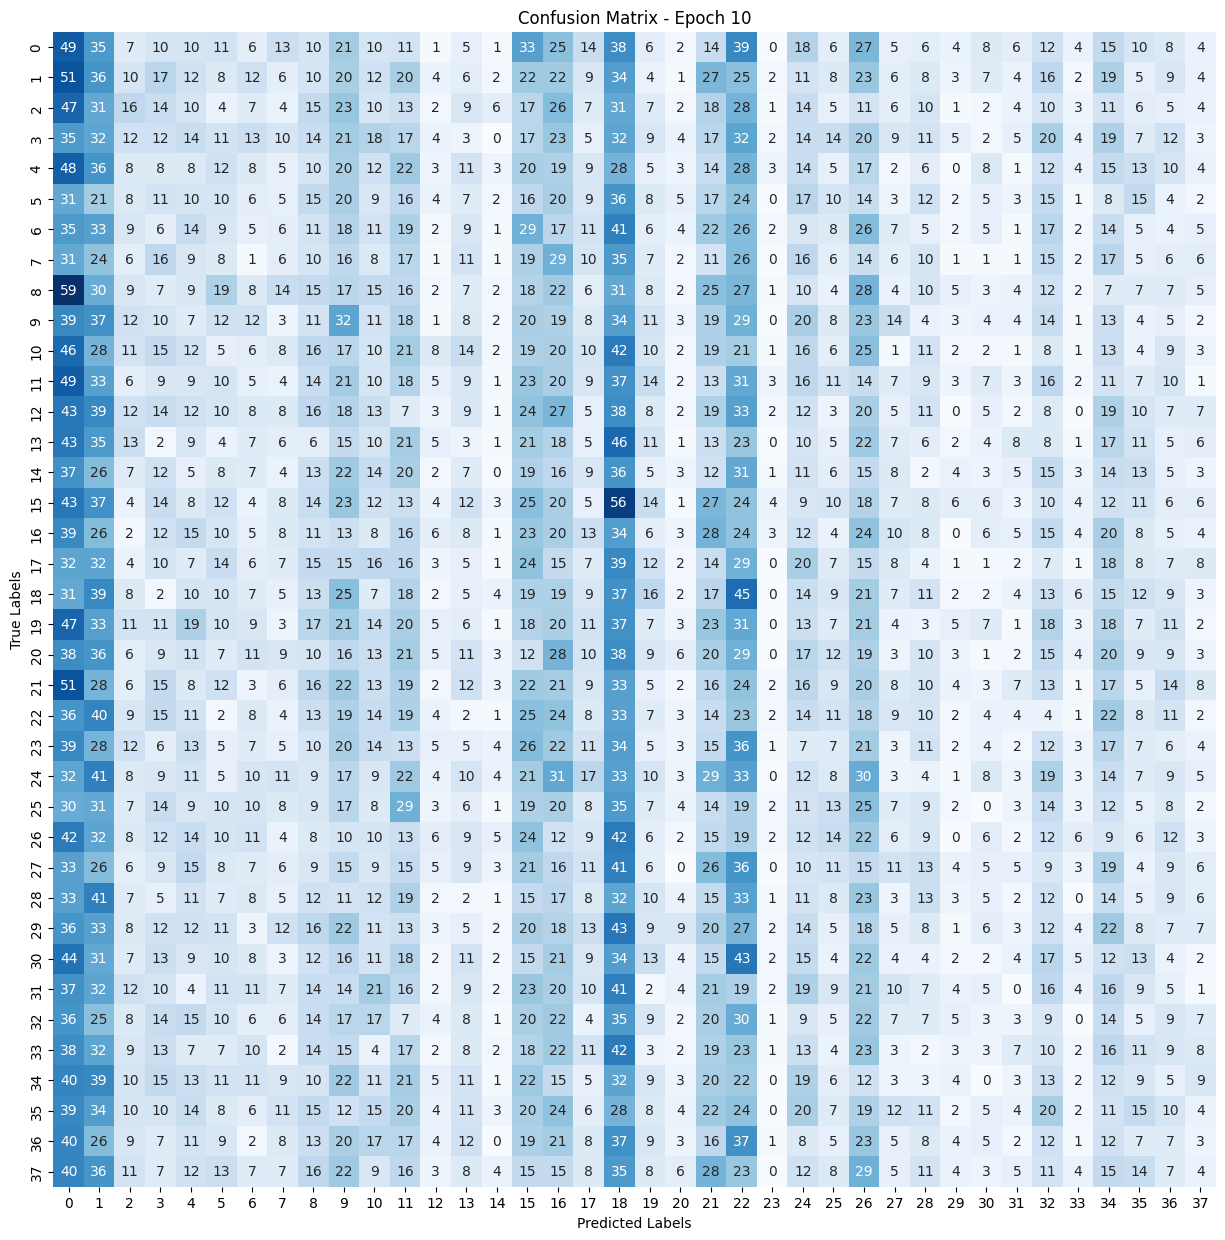

In [9]:
for i in range(1,11):
  epo=i
  epochs.append(epo)
  model=create_model()
  model.fit(x=training_set,validation_data=test_set,epochs=epo,verbose=1)
  test_scores=model.evaluate(test_set)
  print("For epoch=",epo)
  print("Loss:",test_scores[0]*100)
  loss.append(test_scores[0]*100)
  print("Accuracy:",test_scores[1]*100)
  accuracy.append(test_scores[1]*100)
  print("Precision:",test_scores[2]*100)
  precision.append(test_scores[2]*100)
  print("Recall:",test_scores[3]*100)
  recall.append(test_scores[3]*100)
  f1_score=2 * ((test_scores[2] * test_scores[3]) / (test_scores[2]) + test_scores[3])
  print("F1 Score:",f1_score*100)
  f1.append(f1_score*100)
  print("AUC:",test_scores[4]*100)
  auc.append(test_scores[4]*100)
  print("Categorical CrossEntropy:",test_scores[5])
  cross.append(test_scores[5]*100)
  print("MAE:",test_scores[6]*100)
  mae.append(test_scores[6]*100)
  print("MSE:",test_scores[7]*100)
  mse.append(test_scores[7]*100)

  y_test=test_set.labels
  y_pred = model.predict(test_set)
  y_pred_labels = np.argmax(y_pred, axis=1)
  cm = confusion_matrix(y_test, y_pred_labels)
  plt.figure(figsize=(15, 15))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
  plt.title(f"Confusion Matrix - Epoch {epo}")
  plt.xlabel("Predicted Labels")
  plt.ylabel("True Labels")
  plot_filename = os.path.join(save_dir, f"confusion_matrix_epoch_{epo}.jpg")
  plt.savefig(plot_filename)
  plt.show()


In [ ]:
loss,accuracy,f1,recall,precision,auc,mae,mse,epochs

In [19]:
with open("/content/scores.txt","w") as file:

  for value0,value1, value2, value3, value4, value5, value6, value7, value8 in zip(epochs,loss,accuracy,f1,recall,precision,auc,mae,mse):
        line = f"Epoch:{value0},Loss:{value1},Accuracy:{value2},F1-Score:{value3},Recall:{value4},Precision:{value5},AUC:{value6},MAE:{value7},MSE:{value8}\n"
        file.write(line)



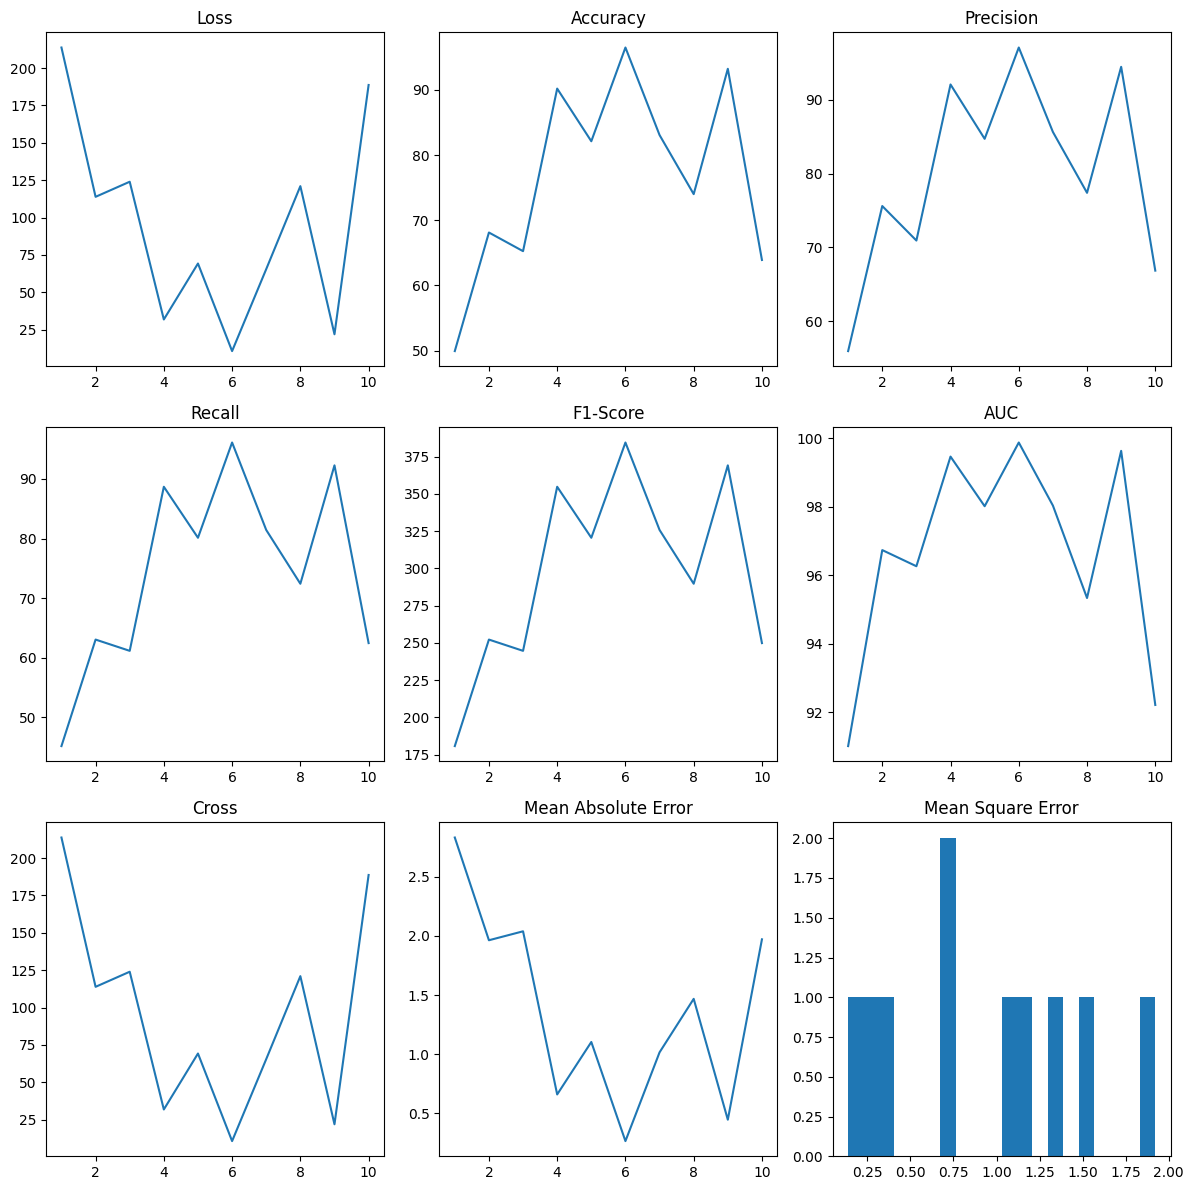

In [21]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes[0, 0].plot(epochs, loss)
axes[0, 0].set_title('Loss')

axes[0, 1].plot(epochs, accuracy)
axes[0, 1].set_title('Accuracy')

axes[0, 2].plot(epochs, precision)
axes[0, 2].set_title('Precision')

axes[1, 0].plot(epochs, recall)
axes[1, 0].set_title('Recall')

axes[1, 1].plot(epochs, f1)
axes[1, 1].set_title('F1-Score')

axes[1, 2].plot(epochs, auc)
axes[1, 2].set_title('AUC')

axes[2, 0].plot(epochs, cross)
axes[2, 0].set_title('Cross')

axes[2, 1].plot(epochs, mae)
axes[2, 1].set_title('Mean Absolute Error')

axes[2, 2].hist(mse, bins=20)
axes[2, 2].set_title('Mean Square Error')

# Adjust layout and display the plots
plt.tight_layout()
plot_filename = os.path.join(save_dir, f"subplot_grid.jpg")
plt.savefig(plot_filename, dpi=300)
plt.show()




In [ ]:
!zip -r /content/scores_graphs.zip /content/scores_graphs